In [203]:
import numpy as np
import pandas as pd
import json

from geopy.geocoders import Nominatim

from urllib.request import urlopen
import urllib.parse

import requests

import folium

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

In [204]:
Hyderabad_areas = pd.DataFrame(columns = ['Areas', 'Latitude', 'Longitude'])
loc = open('Hyderabad_Locations.txt')
i = 0
for line in loc:
    line = line.strip().split(';')
    Hyderabad_areas.loc[i, 'Areas'] = line[0]
    Hyderabad_areas.loc[i, 'Latitude'] = float(line[1])
    Hyderabad_areas.loc[i, 'Longitude'] = float(line[2])
    i += 1
Hyderabad_areas.head()

,Areas,Latitude,Longitude
0,Gachibowli,17.4436,78.352
1,Shamshabad,17.2611,78.3932
2,Kukatpally,17.4931,78.4054
3,Mallapur,17.4405,78.5789
4,Habsiguda,17.4155,78.5427


In [205]:
address = 'Hyderabad'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geograpical coordinate of Hyderabad are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Hyderabad are 17.360589, 78.4740613.


In [206]:
Hyderabad_map = folium.Map(location = [latitude, longitude], zoom_start = 11)
Hyderabad_map

In [221]:
CLIENT_ID = 'SCBZQW3DUP4FFXPDSHOSNGSPIYKBO3HHRTRFERJVMEV4OD0Q' # your Foursquare ID
CLIENT_SECRET = 'KUUZZCKCZL1ECIHPHUURV1214SPO1Q3BSAYMAW4GOIPX3X2A' # your Foursquare Secret
#VERSION = '20180605' # Foursquare API version
VERSION = '20210808'
LIMIT = 100 # A default Foursquare API limit value
radius = 500

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: SCBZQW3DUP4FFXPDSHOSNGSPIYKBO3HHRTRFERJVMEV4OD0Q
CLIENT_SECRET:KUUZZCKCZL1ECIHPHUURV1214SPO1Q3BSAYMAW4GOIPX3X2A


In [222]:
Hyderabad_map = folium.Map(location = [latitude, longitude], zoom_start = 11)

#add markers
for label, lat, long in zip(Hyderabad_areas['Areas'], Hyderabad_areas['Latitude'], Hyderabad_areas['Longitude']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, long],
        radius = 4,
        popup = label,
        color = 'blue',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.6,
        parse_html = False).add_to(Hyderabad_map)

Hyderabad_map

In [229]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list = []
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
        print(url)
        # make the GET request
        try:
            results = requests.get(url).json()["response"]['groups'][0]['items']
        except:
            continue
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [230]:
Hyderabad_venues = getNearbyVenues(names = Hyderabad_areas['Areas'],
                                   latitudes = Hyderabad_areas['Latitude'],
                                   longitudes = Hyderabad_areas['Longitude']
                                  )

Gachibowli
https://api.foursquare.com/v2/venues/explore?&client_id=SCBZQW3DUP4FFXPDSHOSNGSPIYKBO3HHRTRFERJVMEV4OD0Q&client_secret=KUUZZCKCZL1ECIHPHUURV1214SPO1Q3BSAYMAW4GOIPX3X2A&v=20210808&ll=17.4436222,78.3519638&radius=500&limit=100
Shamshabad
https://api.foursquare.com/v2/venues/explore?&client_id=SCBZQW3DUP4FFXPDSHOSNGSPIYKBO3HHRTRFERJVMEV4OD0Q&client_secret=KUUZZCKCZL1ECIHPHUURV1214SPO1Q3BSAYMAW4GOIPX3X2A&v=20210808&ll=17.2611444,78.3931943&radius=500&limit=100
Kukatpally
https://api.foursquare.com/v2/venues/explore?&client_id=SCBZQW3DUP4FFXPDSHOSNGSPIYKBO3HHRTRFERJVMEV4OD0Q&client_secret=KUUZZCKCZL1ECIHPHUURV1214SPO1Q3BSAYMAW4GOIPX3X2A&v=20210808&ll=17.4930841,78.4054408&radius=500&limit=100
Mallapur
https://api.foursquare.com/v2/venues/explore?&client_id=SCBZQW3DUP4FFXPDSHOSNGSPIYKBO3HHRTRFERJVMEV4OD0Q&client_secret=KUUZZCKCZL1ECIHPHUURV1214SPO1Q3BSAYMAW4GOIPX3X2A&v=20210808&ll=17.4405369,78.5788551&radius=500&limit=100
Habsiguda
https://api.foursquare.com/v2/venues/explore?&cl

Bagh Lingampally
https://api.foursquare.com/v2/venues/explore?&client_id=SCBZQW3DUP4FFXPDSHOSNGSPIYKBO3HHRTRFERJVMEV4OD0Q&client_secret=KUUZZCKCZL1ECIHPHUURV1214SPO1Q3BSAYMAW4GOIPX3X2A&v=20210808&ll=17.3974359,78.4979706&radius=500&limit=100
Bahadurpura
https://api.foursquare.com/v2/venues/explore?&client_id=SCBZQW3DUP4FFXPDSHOSNGSPIYKBO3HHRTRFERJVMEV4OD0Q&client_secret=KUUZZCKCZL1ECIHPHUURV1214SPO1Q3BSAYMAW4GOIPX3X2A&v=20210808&ll=17.3570672,78.4545419&radius=500&limit=100
Bairamalguda
https://api.foursquare.com/v2/venues/explore?&client_id=SCBZQW3DUP4FFXPDSHOSNGSPIYKBO3HHRTRFERJVMEV4OD0Q&client_secret=KUUZZCKCZL1ECIHPHUURV1214SPO1Q3BSAYMAW4GOIPX3X2A&v=20210808&ll=17.3410616,78.5423473&radius=500&limit=100
Bakaram
https://api.foursquare.com/v2/venues/explore?&client_id=SCBZQW3DUP4FFXPDSHOSNGSPIYKBO3HHRTRFERJVMEV4OD0Q&client_secret=KUUZZCKCZL1ECIHPHUURV1214SPO1Q3BSAYMAW4GOIPX3X2A&v=20210808&ll=17.4150302,78.4936742&radius=500&limit=100
Balapur
https://api.foursquare.com/v2/venues/explo

Chintal Basti
https://api.foursquare.com/v2/venues/explore?&client_id=SCBZQW3DUP4FFXPDSHOSNGSPIYKBO3HHRTRFERJVMEV4OD0Q&client_secret=KUUZZCKCZL1ECIHPHUURV1214SPO1Q3BSAYMAW4GOIPX3X2A&v=20210808&ll=17.4096785,78.4570516&radius=500&limit=100
Chintalkunta
https://api.foursquare.com/v2/venues/explore?&client_id=SCBZQW3DUP4FFXPDSHOSNGSPIYKBO3HHRTRFERJVMEV4OD0Q&client_secret=KUUZZCKCZL1ECIHPHUURV1214SPO1Q3BSAYMAW4GOIPX3X2A&v=20210808&ll=17.3441101,78.5636781&radius=500&limit=100
Chirag Ali Lane
https://api.foursquare.com/v2/venues/explore?&client_id=SCBZQW3DUP4FFXPDSHOSNGSPIYKBO3HHRTRFERJVMEV4OD0Q&client_secret=KUUZZCKCZL1ECIHPHUURV1214SPO1Q3BSAYMAW4GOIPX3X2A&v=20210808&ll=17.390992,78.4744684&radius=500&limit=100
Chudi Bazar
https://api.foursquare.com/v2/venues/explore?&client_id=SCBZQW3DUP4FFXPDSHOSNGSPIYKBO3HHRTRFERJVMEV4OD0Q&client_secret=KUUZZCKCZL1ECIHPHUURV1214SPO1Q3BSAYMAW4GOIPX3X2A&v=20210808&ll=17.3738134,78.4647791&radius=500&limit=100
D D Colony
https://api.foursquare.com/v2/venue

Golconda X Roads
https://api.foursquare.com/v2/venues/explore?&client_id=SCBZQW3DUP4FFXPDSHOSNGSPIYKBO3HHRTRFERJVMEV4OD0Q&client_secret=KUUZZCKCZL1ECIHPHUURV1214SPO1Q3BSAYMAW4GOIPX3X2A&v=20210808&ll=17.4087116,78.497584&radius=500&limit=100
Gowliguda
https://api.foursquare.com/v2/venues/explore?&client_id=SCBZQW3DUP4FFXPDSHOSNGSPIYKBO3HHRTRFERJVMEV4OD0Q&client_secret=KUUZZCKCZL1ECIHPHUURV1214SPO1Q3BSAYMAW4GOIPX3X2A&v=20210808&ll=17.377643,78.4787716&radius=500&limit=100
Gudimalkapur
https://api.foursquare.com/v2/venues/explore?&client_id=SCBZQW3DUP4FFXPDSHOSNGSPIYKBO3HHRTRFERJVMEV4OD0Q&client_secret=KUUZZCKCZL1ECIHPHUURV1214SPO1Q3BSAYMAW4GOIPX3X2A&v=20210808&ll=17.3879203,78.4371165&radius=500&limit=100
Gudimalkapur New Po
https://api.foursquare.com/v2/venues/explore?&client_id=SCBZQW3DUP4FFXPDSHOSNGSPIYKBO3HHRTRFERJVMEV4OD0Q&client_secret=KUUZZCKCZL1ECIHPHUURV1214SPO1Q3BSAYMAW4GOIPX3X2A&v=20210808&ll=17.3879203,78.4371165&radius=500&limit=100
Gun Foundry
https://api.foursquare.com/v2/

Kavadiguda
https://api.foursquare.com/v2/venues/explore?&client_id=SCBZQW3DUP4FFXPDSHOSNGSPIYKBO3HHRTRFERJVMEV4OD0Q&client_secret=KUUZZCKCZL1ECIHPHUURV1214SPO1Q3BSAYMAW4GOIPX3X2A&v=20210808&ll=17.4227022,78.4917695&radius=500&limit=100
Keshavagiri
https://api.foursquare.com/v2/venues/explore?&client_id=SCBZQW3DUP4FFXPDSHOSNGSPIYKBO3HHRTRFERJVMEV4OD0Q&client_secret=KUUZZCKCZL1ECIHPHUURV1214SPO1Q3BSAYMAW4GOIPX3X2A&v=20210808&ll=17.3235693,78.4791594&radius=500&limit=100
Khairatabad
https://api.foursquare.com/v2/venues/explore?&client_id=SCBZQW3DUP4FFXPDSHOSNGSPIYKBO3HHRTRFERJVMEV4OD0Q&client_secret=KUUZZCKCZL1ECIHPHUURV1214SPO1Q3BSAYMAW4GOIPX3X2A&v=20210808&ll=17.4117706,78.4622003&radius=500&limit=100
King Koti
https://api.foursquare.com/v2/venues/explore?&client_id=SCBZQW3DUP4FFXPDSHOSNGSPIYKBO3HHRTRFERJVMEV4OD0Q&client_secret=KUUZZCKCZL1ECIHPHUURV1214SPO1Q3BSAYMAW4GOIPX3X2A&v=20210808&ll=17.3936821,78.4823947&radius=500&limit=100
King Koti X Road
https://api.foursquare.com/v2/venues/e

Market Street
https://api.foursquare.com/v2/venues/explore?&client_id=SCBZQW3DUP4FFXPDSHOSNGSPIYKBO3HHRTRFERJVMEV4OD0Q&client_secret=KUUZZCKCZL1ECIHPHUURV1214SPO1Q3BSAYMAW4GOIPX3X2A&v=20210808&ll=17.4344005,78.4966889519775&radius=500&limit=100
Marredpally
https://api.foursquare.com/v2/venues/explore?&client_id=SCBZQW3DUP4FFXPDSHOSNGSPIYKBO3HHRTRFERJVMEV4OD0Q&client_secret=KUUZZCKCZL1ECIHPHUURV1214SPO1Q3BSAYMAW4GOIPX3X2A&v=20210808&ll=17.4507936,78.5048972&radius=500&limit=100
Maruthi Colony
https://api.foursquare.com/v2/venues/explore?&client_id=SCBZQW3DUP4FFXPDSHOSNGSPIYKBO3HHRTRFERJVMEV4OD0Q&client_secret=KUUZZCKCZL1ECIHPHUURV1214SPO1Q3BSAYMAW4GOIPX3X2A&v=20210808&ll=17.4341919,78.4972913&radius=500&limit=100
Maruthi Nagar
https://api.foursquare.com/v2/venues/explore?&client_id=SCBZQW3DUP4FFXPDSHOSNGSPIYKBO3HHRTRFERJVMEV4OD0Q&client_secret=KUUZZCKCZL1ECIHPHUURV1214SPO1Q3BSAYMAW4GOIPX3X2A&v=20210808&ll=17.3138317,78.5779533&radius=500&limit=100
Masab Tank
https://api.foursquare.com/v

Nizam Shahi Road
https://api.foursquare.com/v2/venues/explore?&client_id=SCBZQW3DUP4FFXPDSHOSNGSPIYKBO3HHRTRFERJVMEV4OD0Q&client_secret=KUUZZCKCZL1ECIHPHUURV1214SPO1Q3BSAYMAW4GOIPX3X2A&v=20210808&ll=17.378868,78.4738091&radius=500&limit=100
Nizamabad
https://api.foursquare.com/v2/venues/explore?&client_id=SCBZQW3DUP4FFXPDSHOSNGSPIYKBO3HHRTRFERJVMEV4OD0Q&client_secret=KUUZZCKCZL1ECIHPHUURV1214SPO1Q3BSAYMAW4GOIPX3X2A&v=20210808&ll=17.4642451,78.4727742&radius=500&limit=100
Nizampet
https://api.foursquare.com/v2/venues/explore?&client_id=SCBZQW3DUP4FFXPDSHOSNGSPIYKBO3HHRTRFERJVMEV4OD0Q&client_secret=KUUZZCKCZL1ECIHPHUURV1214SPO1Q3BSAYMAW4GOIPX3X2A&v=20210808&ll=17.515397,78.3817156&radius=500&limit=100
Nizampet Road
https://api.foursquare.com/v2/venues/explore?&client_id=SCBZQW3DUP4FFXPDSHOSNGSPIYKBO3HHRTRFERJVMEV4OD0Q&client_secret=KUUZZCKCZL1ECIHPHUURV1214SPO1Q3BSAYMAW4GOIPX3X2A&v=20210808&ll=17.5126025,78.3840819&radius=500&limit=100
Old Alwal
https://api.foursquare.com/v2/venues/explo

Ranigunj
https://api.foursquare.com/v2/venues/explore?&client_id=SCBZQW3DUP4FFXPDSHOSNGSPIYKBO3HHRTRFERJVMEV4OD0Q&client_secret=KUUZZCKCZL1ECIHPHUURV1214SPO1Q3BSAYMAW4GOIPX3X2A&v=20210808&ll=17.4294982,78.4881643&radius=500&limit=100
Rasoolpura
https://api.foursquare.com/v2/venues/explore?&client_id=SCBZQW3DUP4FFXPDSHOSNGSPIYKBO3HHRTRFERJVMEV4OD0Q&client_secret=KUUZZCKCZL1ECIHPHUURV1214SPO1Q3BSAYMAW4GOIPX3X2A&v=20210808&ll=17.4471569,78.4786038&radius=500&limit=100
Red Hills
https://api.foursquare.com/v2/venues/explore?&client_id=SCBZQW3DUP4FFXPDSHOSNGSPIYKBO3HHRTRFERJVMEV4OD0Q&client_secret=KUUZZCKCZL1ECIHPHUURV1214SPO1Q3BSAYMAW4GOIPX3X2A&v=20210808&ll=17.3982921,78.4642498&radius=500&limit=100
Rtc Colony
https://api.foursquare.com/v2/venues/explore?&client_id=SCBZQW3DUP4FFXPDSHOSNGSPIYKBO3HHRTRFERJVMEV4OD0Q&client_secret=KUUZZCKCZL1ECIHPHUURV1214SPO1Q3BSAYMAW4GOIPX3X2A&v=20210808&ll=17.3152786,78.6090515&radius=500&limit=100
RTC X Road
https://api.foursquare.com/v2/venues/explore?&cl

Shivaji Nagar
https://api.foursquare.com/v2/venues/explore?&client_id=SCBZQW3DUP4FFXPDSHOSNGSPIYKBO3HHRTRFERJVMEV4OD0Q&client_secret=KUUZZCKCZL1ECIHPHUURV1214SPO1Q3BSAYMAW4GOIPX3X2A&v=20210808&ll=17.3392935,78.4737879&radius=500&limit=100
Talab Katta
https://api.foursquare.com/v2/venues/explore?&client_id=SCBZQW3DUP4FFXPDSHOSNGSPIYKBO3HHRTRFERJVMEV4OD0Q&client_secret=KUUZZCKCZL1ECIHPHUURV1214SPO1Q3BSAYMAW4GOIPX3X2A&v=20210808&ll=17.3540378,78.4850098&radius=500&limit=100
Tank Bund Road
https://api.foursquare.com/v2/venues/explore?&client_id=SCBZQW3DUP4FFXPDSHOSNGSPIYKBO3HHRTRFERJVMEV4OD0Q&client_secret=KUUZZCKCZL1ECIHPHUURV1214SPO1Q3BSAYMAW4GOIPX3X2A&v=20210808&ll=17.4155599,78.4797478&radius=500&limit=100
Tar Bund
https://api.foursquare.com/v2/venues/explore?&client_id=SCBZQW3DUP4FFXPDSHOSNGSPIYKBO3HHRTRFERJVMEV4OD0Q&client_secret=KUUZZCKCZL1ECIHPHUURV1214SPO1Q3BSAYMAW4GOIPX3X2A&v=20210808&ll=17.4569397,78.4831446&radius=500&limit=100
Tar Bund X Road
https://api.foursquare.com/v2/venu

Keesara
https://api.foursquare.com/v2/venues/explore?&client_id=SCBZQW3DUP4FFXPDSHOSNGSPIYKBO3HHRTRFERJVMEV4OD0Q&client_secret=KUUZZCKCZL1ECIHPHUURV1214SPO1Q3BSAYMAW4GOIPX3X2A&v=20210808&ll=17.5249309,78.6665345&radius=500&limit=100
Khairatabad HO
https://api.foursquare.com/v2/venues/explore?&client_id=SCBZQW3DUP4FFXPDSHOSNGSPIYKBO3HHRTRFERJVMEV4OD0Q&client_secret=KUUZZCKCZL1ECIHPHUURV1214SPO1Q3BSAYMAW4GOIPX3X2A&v=20210808&ll=17.4117706,78.4622003&radius=500&limit=100
Kismatpur
https://api.foursquare.com/v2/venues/explore?&client_id=SCBZQW3DUP4FFXPDSHOSNGSPIYKBO3HHRTRFERJVMEV4OD0Q&client_secret=KUUZZCKCZL1ECIHPHUURV1214SPO1Q3BSAYMAW4GOIPX3X2A&v=20210808&ll=17.3353379,78.3900891&radius=500&limit=100
Kolthur
https://api.foursquare.com/v2/venues/explore?&client_id=SCBZQW3DUP4FFXPDSHOSNGSPIYKBO3HHRTRFERJVMEV4OD0Q&client_secret=KUUZZCKCZL1ECIHPHUURV1214SPO1Q3BSAYMAW4GOIPX3X2A&v=20210808&ll=17.6583198,78.6384067&radius=500&limit=100
Mehdipatnam
https://api.foursquare.com/v2/venues/explore?&c

Sitaphalmandi
https://api.foursquare.com/v2/venues/explore?&client_id=SCBZQW3DUP4FFXPDSHOSNGSPIYKBO3HHRTRFERJVMEV4OD0Q&client_secret=KUUZZCKCZL1ECIHPHUURV1214SPO1Q3BSAYMAW4GOIPX3X2A&v=20210808&ll=17.4297326,78.5174265&radius=500&limit=100
Shyam Nagar
https://api.foursquare.com/v2/venues/explore?&client_id=SCBZQW3DUP4FFXPDSHOSNGSPIYKBO3HHRTRFERJVMEV4OD0Q&client_secret=KUUZZCKCZL1ECIHPHUURV1214SPO1Q3BSAYMAW4GOIPX3X2A&v=20210808&ll=17.3895656,78.4973631&radius=500&limit=100
Ankushapur
https://api.foursquare.com/v2/venues/explore?&client_id=SCBZQW3DUP4FFXPDSHOSNGSPIYKBO3HHRTRFERJVMEV4OD0Q&client_secret=KUUZZCKCZL1ECIHPHUURV1214SPO1Q3BSAYMAW4GOIPX3X2A&v=20210808&ll=17.4597656,78.737024&radius=500&limit=100
Hanumanpet
https://api.foursquare.com/v2/venues/explore?&client_id=SCBZQW3DUP4FFXPDSHOSNGSPIYKBO3HHRTRFERJVMEV4OD0Q&client_secret=KUUZZCKCZL1ECIHPHUURV1214SPO1Q3BSAYMAW4GOIPX3X2A&v=20210808&ll=17.446169,78.5265298&radius=500&limit=100
Himayat Nagar
https://api.foursquare.com/v2/venues/exp

ValueError: Length mismatch: Expected axis has 0 elements, new values have 7 elements

In [231]:
Hyderabad_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Gachibowli,17.443622,78.351964,Karachi Bakery,17.442930,78.355336,Bakery
1,Gachibowli,17.443622,78.351964,Gachibowli Stadium,17.445982,78.348245,Stadium
2,Gachibowli,17.443622,78.351964,creamstone,17.442998,78.355475,Ice Cream Shop
3,Gachibowli,17.443622,78.351964,Chettinaduvilas,17.442858,78.356053,Food Truck
4,Gachibowli,17.443622,78.351964,Mustang terrace,17.442840,78.355320,Italian Restaurant


In [232]:
Hyderabad_venues.shape

(2129, 7)

In [233]:
Hyderabad_venues.groupby('Neighborhood').count().sort_values(by = 'Venue', ascending = False)

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Himayat Nagar,42,42,42,42,42,42
Hyderabad Central,32,32,32,32,32,32
Raj Bhavan Road,31,31,31,31,31,31
Panjagutta,30,30,30,30,30,30
Dwarkapuri Colony,30,30,30,30,30,30
...,...,...,...,...,...,...
New Boyiguda,1,1,1,1,1,1
ECIL,1,1,1,1,1,1
Saidabad Colony,1,1,1,1,1,1


In [234]:
print('There are {} uniques categories.'.format(len(Hyderabad_venues['Venue Category'].unique())))

There are 170 uniques categories.


In [235]:
Hyderabad_onehot = pd.get_dummies(Hyderabad_venues[['Venue Category']], prefix = '', prefix_sep = '')

Hyderabad_onehot['Neighborhood'] = Hyderabad_venues['Neighborhood']

Hyderabad_onehot.head()

,ATM,Accessories Store,Afghan Restaurant,Airport Terminal,American Restaurant,Andhra Restaurant,Antique Shop,Arcade,Arts & Crafts Store,Asian Restaurant,...,Tea Room,Tennis Court,Tex-Mex Restaurant,Theater,Theme Park,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Warehouse Store,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [236]:
Hyderabad_grouped = Hyderabad_onehot.groupby('Neighborhood').mean().reset_index()
Hyderabad_grouped

,Neighborhood,ATM,Accessories Store,Afghan Restaurant,Airport Terminal,American Restaurant,Andhra Restaurant,Antique Shop,Arcade,Arts & Crafts Store,...,Tea Room,Tennis Court,Tex-Mex Restaurant,Theater,Theme Park,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Warehouse Store,Women's Store
0,A C Guards,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.090909,0.000000,0.0,0.0,0.0
1,AG Office,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.083333,0.0,0.0,0.0
2,Abids,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
3,Abids Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
4,Adarsh Nagar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,West Marredpally,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
333,Yapral,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
334,Yellareddyguda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
335,Yousufguda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0


In [237]:
num_top_venues = 5

for neighbor in Hyderabad_grouped['Neighborhood']:
    print('------' + neighbor + '------')
    temp = Hyderabad_grouped[Hyderabad_grouped['Neighborhood'] == neighbor].T.reset_index()
    temp.columns = ['venue', 'freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values(by = 'freq', ascending = False).reset_index(drop = True).head(num_top_venues))
    print('\n')

------A C Guards------
                       venue  freq
0      Hyderabadi Restaurant  0.18
1          Indian Restaurant  0.18
2                 Shoe Store  0.09
3  Middle Eastern Restaurant  0.09
4              Train Station  0.09


------AG Office------
                   venue  freq
0                  Hotel  0.33
1      Indian Restaurant  0.17
2         Science Museum  0.08
3                 Lounge  0.08
4  Performing Arts Venue  0.08


------Abids------
               venue  freq
0  Indian Restaurant  0.18
1          Juice Bar  0.12
2         Shoe Store  0.12
3              Hotel  0.12
4      Shopping Mall  0.06


------Abids Road------
                  venue  freq
0                 Hotel  0.17
1                Bakery  0.17
2  Fast Food Restaurant  0.11
3            Shoe Store  0.11
4     Indian Restaurant  0.11


------Adarsh Nagar------
               venue  freq
0              Hotel  0.14
1  Indian Restaurant  0.14
2        Planetarium  0.14
3     Science Museum  0.14
4       

4                   Metro Station   0.0


------Boudha Nagar------
                            venue  freq
0                             ATM  0.25
1                     IT Services  0.25
2              Light Rail Station  0.25
3                Business Service  0.25
4  Multicuisine Indian Restaurant  0.00


------Bowenpally------
                   venue  freq
0              Multiplex  0.14
1  Hyderabadi Restaurant  0.14
2       Airport Terminal  0.14
3   Fast Food Restaurant  0.14
4               Bus Stop  0.14


------Boyiguda------
                       venue  freq
0             Ice Cream Shop   1.0
1                        ATM   0.0
2                  Multiplex   0.0
3              Metro Station   0.0
4  Middle Eastern Restaurant   0.0


------Central Police Lines------
              venue  freq
0    Cricket Ground   0.2
1    Clothing Store   0.2
2          Tea Room   0.2
3          Boutique   0.2
4  Kebab Restaurant   0.2


------Chaderghat------
               venue  freq
0     

4  Metro Station   0.0


------Gandhi Bhavan------
                 venue  freq
0  Fried Chicken Joint   0.5
1          Planetarium   0.5
2                  ATM   0.0
3        Movie Theater   0.0
4          Men's Store   0.0


------Gandhi Nagar------
                            venue  freq
0                            Park   0.5
1                      Playground   0.5
2  Multicuisine Indian Restaurant   0.0
3                     Men's Store   0.0
4                   Metro Station   0.0


------General Bazar------
                            venue  freq
0                             ATM   0.5
1              Photography Studio   0.5
2  Multicuisine Indian Restaurant   0.0
3                     Men's Store   0.0
4                   Metro Station   0.0


------Ghansi Bazar------
                     venue  freq
0              Coffee Shop   0.2
1           History Museum   0.2
2  South Indian Restaurant   0.2
3      Monument / Landmark   0.2
4                     Café   0.2


------Ghatkes

                       venue  freq
0          Convenience Store  0.25
1             Breakfast Spot  0.25
2  Middle Eastern Restaurant  0.25
3           Asian Restaurant  0.25
4                  Multiplex  0.00


------King Koti X Road------
                       venue  freq
0          Convenience Store  0.25
1             Breakfast Spot  0.25
2  Middle Eastern Restaurant  0.25
3           Asian Restaurant  0.25
4                  Multiplex  0.00


------Kismatpur------
                            venue  freq
0                             ATM   1.0
1  Multicuisine Indian Restaurant   0.0
2                     Men's Store   0.0
3                   Metro Station   0.0
4       Middle Eastern Restaurant   0.0


------Kompally------
               venue  freq
0  Indian Restaurant  0.75
1        Gaming Cafe  0.25
2                ATM  0.00
3      Movie Theater  0.00
4        Men's Store  0.00


------Kondapur------
                  venue  freq
0     Indian Restaurant  0.16
1            Rest

                            venue  freq
0                            Park  0.33
1              Chinese Restaurant  0.33
2                       Bookstore  0.33
3  Multicuisine Indian Restaurant  0.00
4                     Men's Store  0.00


------Namala Gundu------
                  venue  freq
0  Fast Food Restaurant  0.25
1     Indian Restaurant  0.25
2      Department Store  0.25
3         Grocery Store  0.25
4                   ATM  0.00


------Nampally------
                 venue  freq
0               Bakery  0.17
1  Fried Chicken Joint  0.17
2        Train Station  0.17
3    Indian Restaurant  0.17
4             Platform  0.17


------Nampally Station Road------
                 venue  freq
0           Shoe Store  0.17
1                Hotel  0.17
2        Train Station  0.17
3  Fried Chicken Joint  0.17
4      Bed & Breakfast  0.17


------Nanakramguda------
                venue  freq
0  Italian Restaurant   0.2
1         Coffee Shop   0.2
2              Buffet   0.2
3      

              venue  freq
0               ATM  0.25
1  Business Service  0.25
2    Sandwich Place  0.25
3              Café  0.25
4      Noodle House  0.00


------Rail Nilayam------
                            venue  freq
0       Middle Eastern Restaurant  0.33
1               Electronics Store  0.33
2                           Diner  0.33
3                             ATM  0.00
4  Multicuisine Indian Restaurant  0.00


------Raj Bhavan------
                            venue  freq
0                           Hotel  0.25
1            Fast Food Restaurant  0.25
2                     Pizza Place  0.25
3                      Donut Shop  0.25
4  Multicuisine Indian Restaurant  0.00


------Raj Bhavan Road------
                  venue  freq
0     Indian Restaurant  0.13
1  Fast Food Restaurant  0.10
2        Sandwich Place  0.06
3           Coffee Shop  0.06
4           Pizza Place  0.06


------Ram Nagar------
                            venue  freq
0                    Burger Joint   1.

4                   Metro Station   0.0


------St. Johns Road------
                            venue  freq
0           Performing Arts Venue  0.25
1                     Bus Station  0.25
2                        Platform  0.25
3                        Tea Room  0.25
4  Multicuisine Indian Restaurant  0.00


------Subash Road------
                            venue  freq
0               Indian Restaurant   0.5
1                        Tea Room   0.5
2                             ATM   0.0
3  Multicuisine Indian Restaurant   0.0
4                     Men's Store   0.0


------Sultan Bazar------
                 venue  freq
0                 Café  0.17
1          Coffee Shop  0.17
2  Indie Movie Theater  0.17
3          Bus Station  0.17
4          Chaat Place  0.17


------Sultan Shahi------
                       venue  freq
0                       Café   1.0
1                  Multiplex   0.0
2              Metro Station   0.0
3  Middle Eastern Restaurant   0.0
4          Mobile Phon

In [238]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [239]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Hyderabad_grouped['Neighborhood']

for ind in np.arange(Hyderabad_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Hyderabad_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,A C Guards,Indian Restaurant,Hyderabadi Restaurant,Middle Eastern Restaurant,South Indian Restaurant,Bakery,Ice Cream Shop,Café,Shoe Store,Train Station,Dessert Shop
1,AG Office,Hotel,Indian Restaurant,Coffee Shop,Science Museum,Performing Arts Venue,Planetarium,Lounge,Vegetarian / Vegan Restaurant,Diner,Farmers Market
2,Abids,Indian Restaurant,Shoe Store,Juice Bar,Hotel,Department Store,Shopping Mall,Snack Place,South Indian Restaurant,Diner,Mobile Phone Shop
3,Abids Road,Hotel,Bakery,Fast Food Restaurant,Indian Restaurant,Shoe Store,Shopping Mall,Juice Bar,Mobile Phone Shop,Diner,Department Store
4,Adarsh Nagar,Indian Restaurant,Hotel,Lounge,Planetarium,Arts & Crafts Store,Science Museum,Park,Cricket Ground,Dog Run,Fast Food Restaurant


In [240]:
neighborhoods_venues_sorted['1st Most Common Venue'].value_counts()

Indian Restaurant       54
ATM                     50
Coffee Shop             22
Fast Food Restaurant    18
Hotel                   11
                        ..
Farmers Market           1
Asian Restaurant         1
Grocery Store            1
Resort                   1
Brewery                  1
Name: 1st Most Common Venue, Length: 71, dtype: int64

Text(0, 0.5, 'Count')

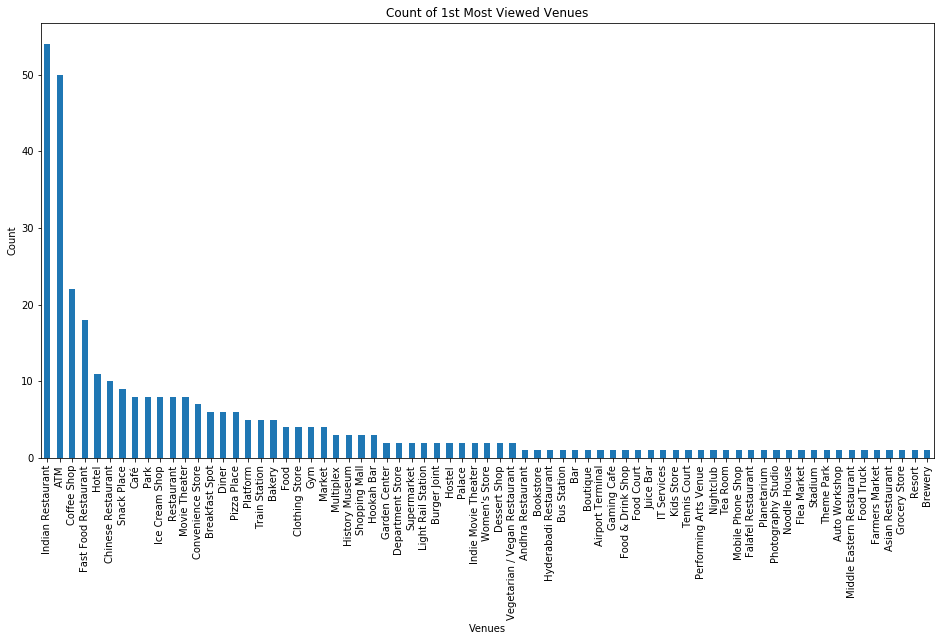

In [241]:
plt.figure(figsize = (16, 8))
neighborhoods_venues_sorted['1st Most Common Venue'].value_counts().plot(kind = 'bar')
plt.title('Count of 1st Most Viewed Venues')
plt.xlabel('Venues')
plt.ylabel('Count')

1st Most Viewed Neighborhood for Indian Restaurant 

In [242]:
neighborhoods_venues_sorted[neighborhoods_venues_sorted['1st Most Common Venue'] == 'Indian Restaurant']['Neighborhood']

0                 A C Guards
2                      Abids
4               Adarsh Nagar
13                  Ameerpet
14           Ameerpet X Road
16               Anand Nagar
31                 Balkampet
34               Bank Street
40                  Begumpet
46              Boggulakunta
61              Chintalkunta
77         Dwarkapuri Colony
81                 Ecil Post
102             Gudimalkapur
103      Gudimalkapur New Po
105                Habsiguda
116        Hyderabad Central
117            Hyderabad GPO
119                Hyderguda
124              Indira Park
129            Jubilee Hills
134           Kakatiya Nagar
151                 Kompally
153                Kothaguda
156                     Kphb
157              Kphb Colony
159               Kukatpally
169     Lower Tank Bund Road
171                 Madhapur
172            Madhura Nagar
187               Masab Tank
189              Mehdipatnam
190       Mehdipatnam X Road
191                  Miyapur
198           

In [243]:
# set number of clusters
kclusters = 5

Hyderabad_grouped_clustering = Hyderabad_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Hyderabad_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([4, 2, 2, 0, 4, 4, 4, 2, 4, 4])

In [244]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Hyderabad_merged = Hyderabad_areas

# merge Hyderabad_grouped with neighborhoods_venues_sorted to add latitude/longitude for each neighborhood
Hyderabad_merged = pd.merge(Hyderabad_merged, neighborhoods_venues_sorted, left_on = 'Areas', right_on='Neighborhood').drop('Neighborhood', axis = 1)

Hyderabad_merged.head(10) # check the last columns!

,Areas,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Gachibowli,17.4436,78.352,4,Café,Italian Restaurant,Department Store,Food Truck,Stadium,Indian Restaurant,Ice Cream Shop,Bakery,Hotel,Grocery Store
1,Shamshabad,17.2611,78.3932,4,Park,Café,Dhaba,Women's Store,Diner,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Dumpling Restaurant
2,Kukatpally,17.4931,78.4054,2,Indian Restaurant,Fast Food Restaurant,Pizza Place,Shop & Service,Metro Station,Middle Eastern Restaurant,Bakery,BBQ Joint,Ice Cream Shop,Food
3,Mallapur,17.4405,78.5789,4,Diner,Women's Store,Fishing Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Dumpling Restaurant,Donut Shop,Dog Run
4,Mallapur,17.4405,78.5789,4,Diner,Women's Store,Fishing Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Dumpling Restaurant,Donut Shop,Dog Run
5,Habsiguda,17.4155,78.5427,0,Indian Restaurant,Restaurant,Bakery,Sandwich Place,Park,Women's Store,Diner,Falafel Restaurant,Electronics Store,Dumpling Restaurant
6,Jubilee Hills,17.4308,78.4103,4,Indian Restaurant,Coffee Shop,Hookah Bar,Ice Cream Shop,Frozen Yogurt Shop,Bowling Alley,Bistro,Café,Juice Bar,Bar
7,Secunderabad,17.4691,78.5059,4,Hookah Bar,Sandwich Place,Ice Cream Shop,Café,Diner,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Dumpling Restaurant
8,Banjara Hills,17.4177,78.4399,4,Coffee Shop,Indian Restaurant,Café,Deli / Bodega,Sandwich Place,Bar,Bakery,Hookah Bar,Garden Center,Gym
9,Manikonda,17.4037,78.3766,0,Pizza Place,Restaurant,Women's Store,Dhaba,Farmers Market,Falafel Restaurant,Electronics Store,Dumpling Restaurant,Donut Shop,Dog Run


In [245]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Hyderabad_merged['Latitude'], Hyderabad_merged['Longitude'], Hyderabad_merged['Areas'], Hyderabad_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

##### Cluster 1

In [246]:
Cluster_1 = Hyderabad_merged.loc[Hyderabad_merged['Cluster Labels'] == 1, Hyderabad_merged.columns[[0] + list(range(4, Hyderabad_merged.shape[1]))]]
Cluster_1

,Areas,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Quthbullapur,ATM,Food Truck,Department Store,Diner,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Dumpling Restaurant,Donut Shop
22,Aliabad,ATM,Fast Food Restaurant,Snack Place,Ice Cream Shop,Diner,Farmers Market,Falafel Restaurant,Electronics Store,Dumpling Restaurant,Donut Shop
30,Auto Nagar,ATM,Diner,Fishing Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Dumpling Restaurant,Donut Shop,Dog Run
35,Bahadurpura,ATM,Museum,Café,Diner,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Dumpling Restaurant,Donut Shop
46,Bhagya Nagar Colony,ATM,Diner,Fishing Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Dumpling Restaurant,Donut Shop,Dog Run
51,Borabanda,ATM,Movie Theater,Construction & Landscaping,Dog Run,Fishing Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Dumpling Restaurant
61,Chintal,ATM,Department Store,Diner,Fishing Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Dumpling Restaurant,Donut Shop
66,D D Colony,ATM,Diner,Fishing Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Dumpling Restaurant,Donut Shop,Dog Run
73,Doodh Bowli,ATM,Arts & Crafts Store,Diner,Fishing Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Dumpling Restaurant,Donut Shop
85,Fateh Darwaza,ATM,Arts & Crafts Store,Diner,Fishing Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Dumpling Restaurant,Donut Shop


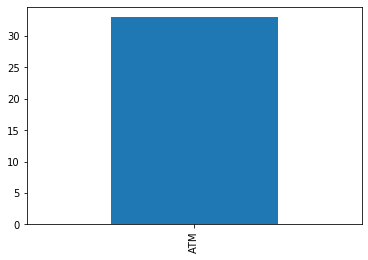

In [247]:
Cluster_1['1st Most Common Venue'].value_counts().plot(kind = 'bar')

##### Cluster 2

In [248]:
Cluster_2 = Hyderabad_merged.loc[Hyderabad_merged['Cluster Labels'] == 2, Hyderabad_merged.columns[[0] + list(range(4, Hyderabad_merged.shape[1]))]]
Cluster_2

,Areas,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Kukatpally,Indian Restaurant,Fast Food Restaurant,Pizza Place,Shop & Service,Metro Station,Middle Eastern Restaurant,Bakery,BBQ Joint,Ice Cream Shop,Food
10,Ameerpet,Indian Restaurant,Fast Food Restaurant,Food Court,Mobile Phone Shop,Snack Place,Sandwich Place,Café,Supermarket,Candy Store,Hotel
24,Ameerpet X Road,Indian Restaurant,Diner,Women's Store,Fishing Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Dumpling Restaurant,Donut Shop
25,Anand Bagh,Supermarket,Fast Food Restaurant,Bank,Indian Restaurant,Diner,Fishing Store,Farmers Market,Falafel Restaurant,Electronics Store,Dumpling Restaurant
36,Bairamalguda,ATM,Night Market,Garden Center,Indian Restaurant,Diner,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Dumpling Restaurant
...,...,...,...,...,...,...,...,...,...,...,...
317,Snehapuri Colony,Indian Restaurant,Bank,Bakery,Women's Store,Donut Shop,Flea Market,Fishing Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant
321,Abids,Indian Restaurant,Shoe Store,Juice Bar,Hotel,Department Store,Shopping Mall,Snack Place,South Indian Restaurant,Diner,Mobile Phone Shop
323,Sanjeeva Reddy Nagar,Indian Restaurant,Breakfast Spot,Sporting Goods Shop,Juice Bar,Department Store,Bar,Pizza Place,Café,South Indian Restaurant,Women's Store
327,Moghalpura,Juice Bar,Dessert Shop,Indian Restaurant,Café,Women's Store,Dog Run,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store


Text(0, 0.5, 'Count')

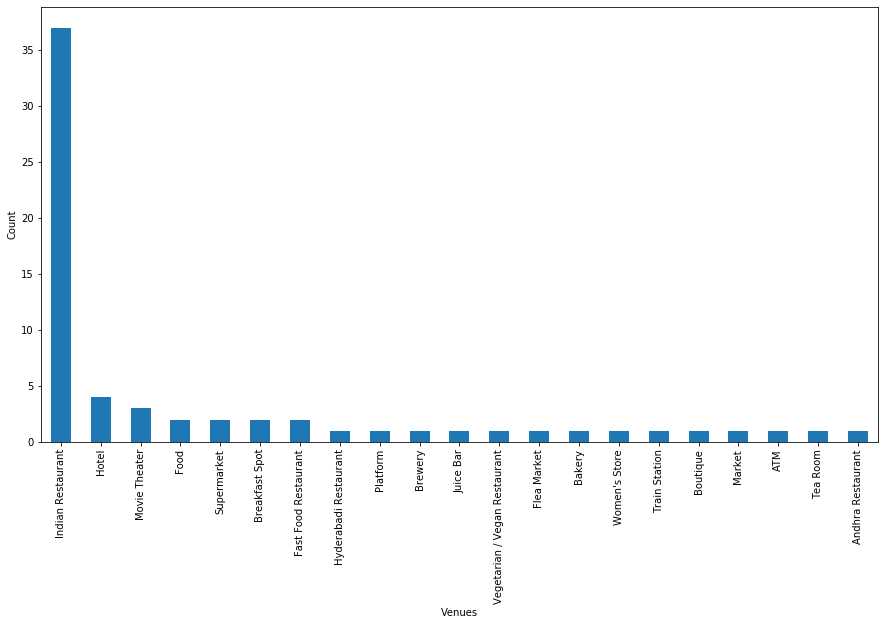

In [249]:
plt.figure(figsize = (15, 8))
Cluster_2['1st Most Common Venue'].value_counts().plot(kind = 'bar')
plt.xlabel('Venues')
plt.ylabel('Count')

##### Cluster 3

In [250]:
Cluster_3 = Hyderabad_merged.loc[Hyderabad_merged['Cluster Labels'] == 3, Hyderabad_merged.columns[[0] + list(range(4, Hyderabad_merged.shape[1]))]]
Cluster_3

,Areas,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
181,Narayanaguda,Snack Place,Ice Cream Shop,Indian Restaurant,Women's Store,Dog Run,Fishing Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store
212,Prakash Nagar,Snack Place,Women's Store,Flower Shop,Fishing Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Dumpling Restaurant,Donut Shop
219,Ramakrishna Puram,Snack Place,Women's Store,Flower Shop,Fishing Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Dumpling Restaurant,Donut Shop
220,Ramakrishna Puram Road,Snack Place,Women's Store,Flower Shop,Fishing Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Dumpling Restaurant,Donut Shop
266,Troop Bazar,Snack Place,Women's Store,Flower Shop,Fishing Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Dumpling Restaurant,Donut Shop
288,Keesara,Snack Place,Women's Store,Flower Shop,Fishing Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Dumpling Restaurant,Donut Shop
334,Saidabad Colony,Snack Place,Women's Store,Flower Shop,Fishing Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Dumpling Restaurant,Donut Shop


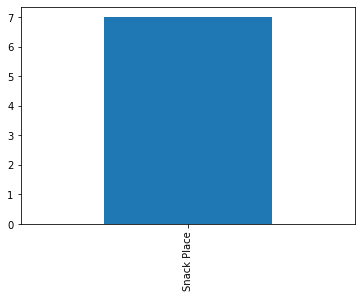

In [251]:
Cluster_3['1st Most Common Venue'].value_counts().plot(kind = 'bar')

##### Cluster 4

In [252]:
Cluster_4 = Hyderabad_merged.loc[Hyderabad_merged['Cluster Labels'] == 4, Hyderabad_merged.columns[[0] + list(range(4, Hyderabad_merged.shape[1]))]]
Cluster_4

,Areas,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Gachibowli,Café,Italian Restaurant,Department Store,Food Truck,Stadium,Indian Restaurant,Ice Cream Shop,Bakery,Hotel,Grocery Store
1,Shamshabad,Park,Café,Dhaba,Women's Store,Diner,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Dumpling Restaurant
3,Mallapur,Diner,Women's Store,Fishing Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Dumpling Restaurant,Donut Shop,Dog Run
4,Mallapur,Diner,Women's Store,Fishing Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Dumpling Restaurant,Donut Shop,Dog Run
6,Jubilee Hills,Indian Restaurant,Coffee Shop,Hookah Bar,Ice Cream Shop,Frozen Yogurt Shop,Bowling Alley,Bistro,Café,Juice Bar,Bar
...,...,...,...,...,...,...,...,...,...,...,...
331,Old MLA Quarters,Chinese Restaurant,Restaurant,Ice Cream Shop,Park,Science Museum,Jewelry Store,Planetarium,Café,Indian Restaurant,Pharmacy
332,New MLA Quarters,Chinese Restaurant,Restaurant,Ice Cream Shop,Park,Science Museum,Jewelry Store,Planetarium,Café,Indian Restaurant,Pharmacy
335,Sanath Nagar Colony,Train Station,Department Store,Bus Station,Women's Store,Dog Run,Fishing Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store
336,Parishram Bhavan,Chinese Restaurant,Restaurant,Indian Restaurant,Ice Cream Shop,Arts & Crafts Store,Café,Pharmacy,Stadium,Smoke Shop,Jewelry Store


Text(0, 0.5, 'Count')

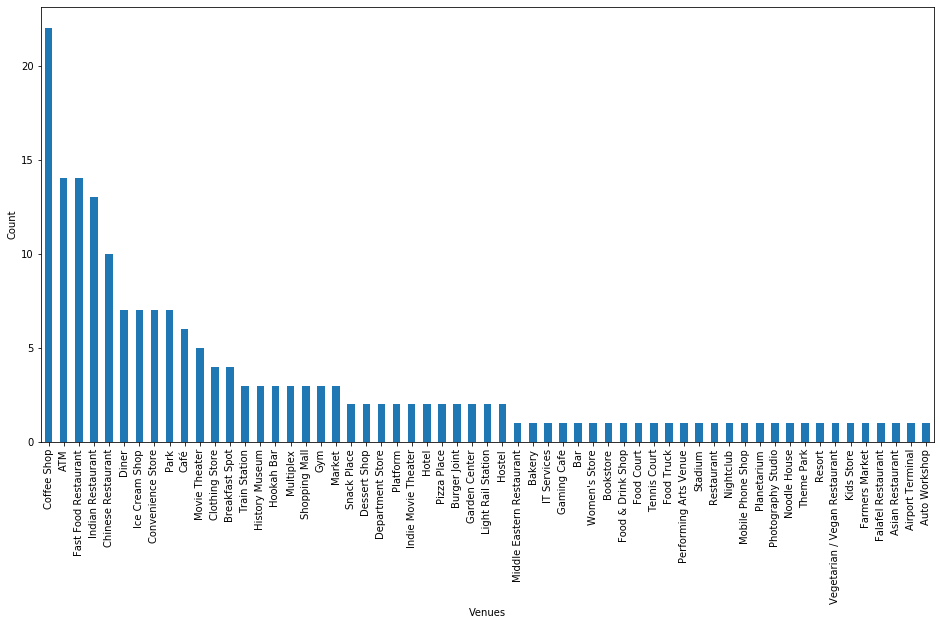

In [253]:
plt.figure(figsize = (16, 8))
Cluster_4['1st Most Common Venue'].value_counts().plot(kind = 'bar')
plt.xlabel('Venues')
plt.ylabel('Count')

##### Cluster 5

In [254]:
Cluster_5 = Hyderabad_merged.loc[Hyderabad_merged['Cluster Labels'] == 5, Hyderabad_merged.columns[[0] + list(range(4, Hyderabad_merged.shape[1]))]]
Cluster_5

,Areas,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
